# Session Objectives

- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algo :gradient descent
- Gather all three functions above into a main model function, in the right order.
- learn how to implement backpropagation efficiently
- learn how to read learning curve

## 1 - Packages ##


First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 2 - Overview of the Problem set ##


In [2]:
# Creating data set 
# A 
a =[0, 0, 1, 1, 0, 0, 
   0, 1, 0, 0, 1, 0, 
   1, 1, 1, 1, 1, 1, 
   1, 0, 0, 0, 0, 1, 
   1, 0, 0, 0, 0, 1] 
# B 
b =[0, 1, 1, 1, 1, 0, 
   0, 1, 0, 0, 1, 0, 
   0, 1, 1, 1, 1, 0, 
   0, 1, 0, 0, 1, 0, 
   0, 1, 1, 1, 1, 0] 
# C 
c =[0, 1, 1, 1, 1, 0, 
   0, 1, 0, 0, 0, 0, 
   0, 1, 0, 0, 0, 0, 
   0, 1, 0, 0, 0, 0, 
   0, 1, 1, 1, 1, 0] 
  
# Creating labels 
y =[[1, 0, 0], 
   [0, 1, 0], 
   [0, 0, 1]] 

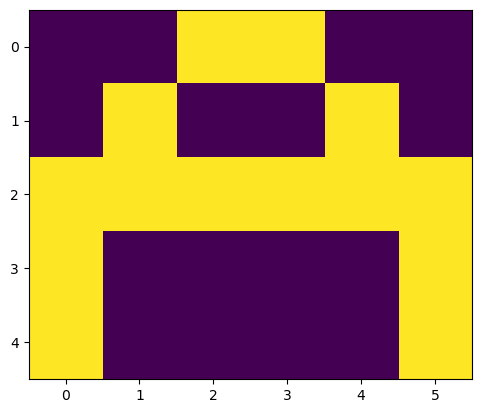

In [3]:
# visualizing the data, ploting A. 
plt.imshow(np.array(a).reshape(5, 6)) 
plt.show()

## 3 - Preprocessing steps
- 1- Convert the matrix of 0 and 1 into one hot vector so that we can directly feed it to the neural network, these vectors are then stored in a list x. 
- 2- Labels are also converted into NumPy array 

In [4]:
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),  
                                np.array(c).reshape(1, 30)] 

x=np.array(x).reshape(3,30)
y=np.array(y)
 #to do : X  should be (3,30) & y shoud be (3,3) numpy arrayes

## 4 - Building NN moded 

Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)
    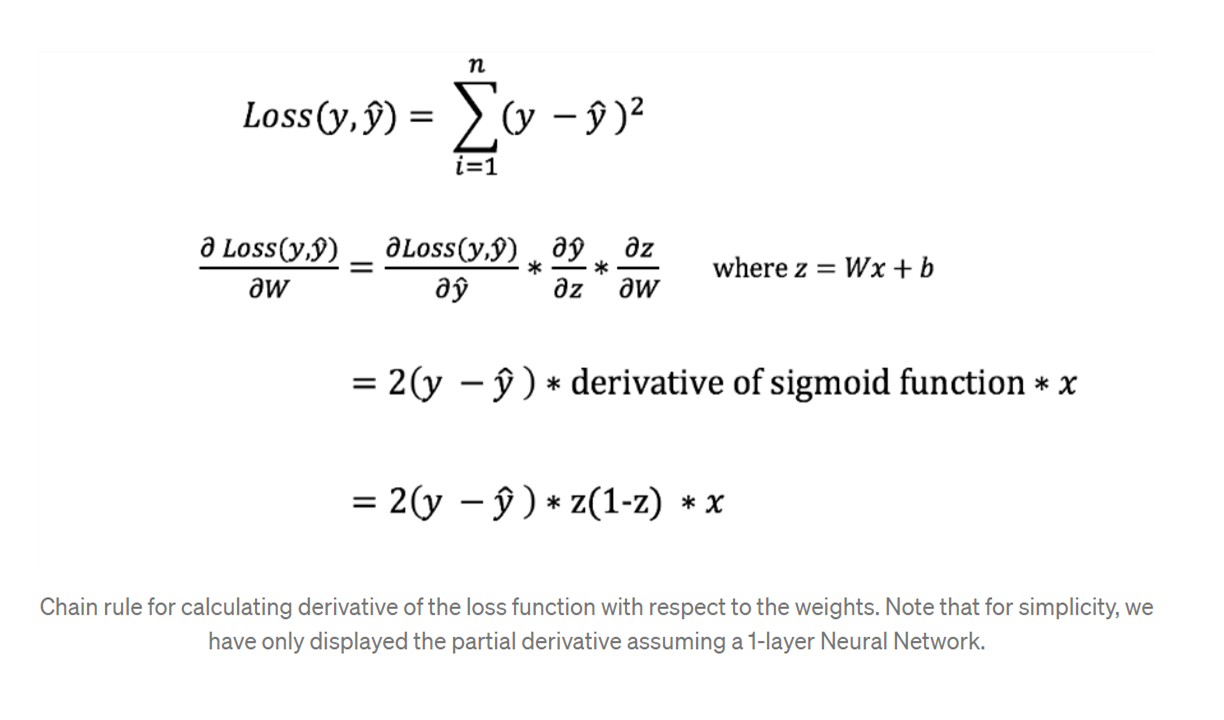


1st layer: Input layer(1, 30)
2nd layer: Hidden layer (1, 5)
3rd layer: Output layer(3, 3)



In [5]:
def sigmoid(x):
        return 1/(1+np.exp(-x))

In [6]:
#the derivate of te activation function
def sigmoid_derivative(x):
    return x*(1-x)


In [7]:

def generate_wt(x, y): 
    l =[] 
    for i in range(x * y): 
        l.append(np.random.randn()) 
    return(np.array(l).reshape(x, y)) 


class NeuralNetwork:
   
    # constructor for this VERY particular network with 2 layers (plus one for input) # one hidden layer
    
    def __init__(self, x, y,hidden, out):
        self.input      = x
        self.weights1   = generate_wt(self.input.shape[1],hidden)
        self.weights2   = generate_wt(hidden,out)               
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        self.loss       = []
        



    # the function that computs the output of the network for some input
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input,self.weights1))
        self.output = sigmoid(np.dot(self.layer1,self.weights2))
        


    # the backpropagation algorithm 
    def backprop(self,l_rate):
        
    # application of the chain rule to find derivative of the    
    #loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T,2*(self.y-self.output)*sigmoid_derivative(self.output))

        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y -
                        self.output) * sigmoid_derivative(self.output),
                        self.weights2.T) *
                         sigmoid_derivative(self.layer1)))
        # update the weights with the derivative (slope) of the loss function

        self.weights1 += l_rate * d_weights1
        self.weights2 += l_rate * d_weights2
        self.loss.append(np.sum(y-self.output)**2)
        

[[9.88221663e-01 1.28195397e-02 8.65698665e-04]
 [8.98984115e-03 9.87112213e-01 9.35627036e-03]
 [6.92451038e-03 8.43520217e-03 9.89403398e-01]]


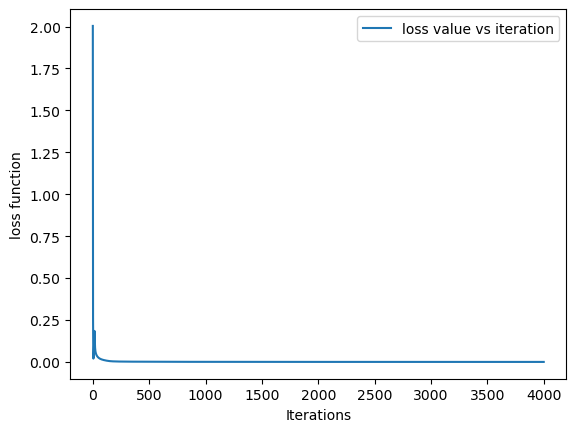

In [8]:
nn = NeuralNetwork(x,y,5,3)

nn.loss=[]
iterations =[]
for i in range(4000):
    nn.feedforward()
    nn.backprop(1)
    iterations.append(i)

print(nn.output)
plt.plot(iterations, nn.loss, label='loss value vs iteration')
plt.xlabel('Iterations')
plt.ylabel('loss function')
plt.legend()
plt.show()
